### Sensor dS 14d

In [2]:
# Data Science Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.utils import resample

# ML Models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

### Temperature

In [2]:
df_sensor_dS = pd.read_csv('sensor_dS_14d_temp.csv')

In [3]:
# distance is 30 min
df_sensor_dS

,result,table,_start,_stop,_time,_value,Device Type,Key Values,Manufacturer,_field,_measurement,article_no,measuring_time,rotation,sensor,serial_no
0,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-11 06:30:00+00:00,38.685872,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
1,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-11 07:00:00+00:00,38.887321,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
2,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-11 07:30:00+00:00,39.211287,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
3,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-11 08:00:00+00:00,39.593916,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
4,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-11 08:30:00+00:00,40.027108,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-20 05:00:00+00:00,40.800856,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
323,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-20 05:30:00+00:00,40.745551,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
324,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-20 15:30:00+00:00,42.652110,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T
325,_result,0,2023-09-06 16:39:07.326420+00:00,2023-09-20 16:39:07.326420+00:00,2023-09-20 16:00:00+00:00,42.810925,NaN,NaN,NaN,temp,temperature,NaN,NaN,NaN,NaN,TC150T


In [5]:
unique_values_raw = df_sensor_dS['_field'].unique()

# Print or use the unique values as needed
print(unique_values_raw)

['temp']


In [6]:
df_sensor_raw = df_sensor_dS[["_time", "_value", "_field", "_measurement"]]
df_sensor_raw.head()

,_time,_value,_field,_measurement
0,2023-09-11 06:30:00+00:00,38.685872,temp,temperature
1,2023-09-11 07:00:00+00:00,38.887321,temp,temperature
2,2023-09-11 07:30:00+00:00,39.211287,temp,temperature
3,2023-09-11 08:00:00+00:00,39.593916,temp,temperature
4,2023-09-11 08:30:00+00:00,40.027108,temp,temperature


In [7]:
# # rms_high_frequency
# condition = (df_sensor_raw['_field'] == 'temp')

# # Use the mask to filter the DataFrame
# filtered_df_temp = df_sensor_raw[condition]

In [8]:
pivoted_df_temp = df_sensor_raw.pivot(index='_time', columns='_field', values='_value').reset_index()

In [9]:
pivoted_df_temp

_field,_time,temp
0,2023-09-11 06:30:00+00:00,38.685872
1,2023-09-11 07:00:00+00:00,38.887321
2,2023-09-11 07:30:00+00:00,39.211287
3,2023-09-11 08:00:00+00:00,39.593916
4,2023-09-11 08:30:00+00:00,40.027108
...,...,...
322,2023-09-20 05:00:00+00:00,40.800856
323,2023-09-20 05:30:00+00:00,40.745551
324,2023-09-20 15:30:00+00:00,42.652110
325,2023-09-20 16:00:00+00:00,42.810925


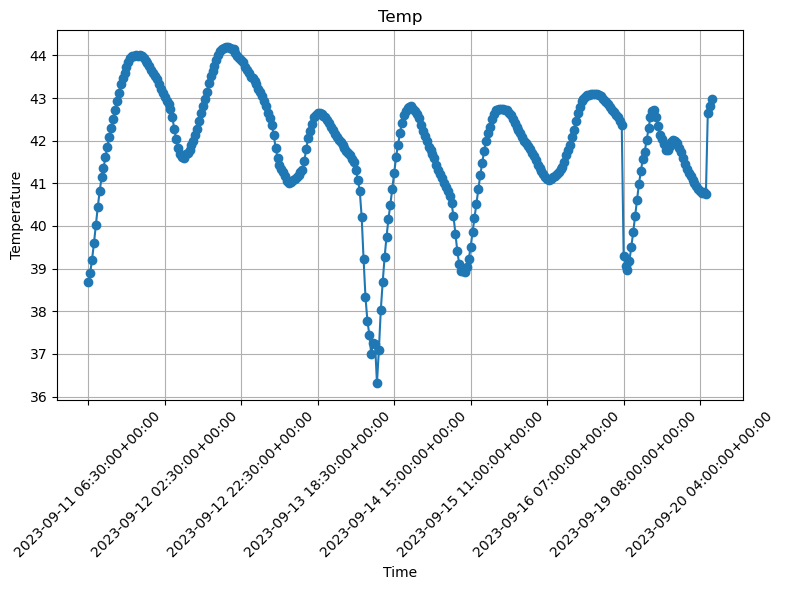

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(pivoted_df_temp['_time'],
         pivoted_df_temp['temp'],
         marker='o',
         linestyle='-')
plt.title('Temp')
plt.xlabel('Time')
plt.ylabel('Temperature')

# Customize x-axis locator to show a specific number of labels (e.g., 10)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

### RMS high frequency

In [3]:
df_rms_frequency = pd.read_csv('sensor_dS_14d_rms_high_frequency.csv')

In [4]:
df_rms_frequency = df_rms_frequency[["_time", "_value", "_field", "_measurement"]]
df_rms_frequency.head()

,_time,_value,_field,_measurement
0,2023-09-11 06:30:00+00:00,5.092026,rms_high_frequency,vibration
1,2023-09-11 07:00:00+00:00,3.946572,rms_high_frequency,vibration
2,2023-09-11 07:30:00+00:00,0.975282,rms_high_frequency,vibration
3,2023-09-11 08:00:00+00:00,0.986012,rms_high_frequency,vibration
4,2023-09-11 08:30:00+00:00,1.034499,rms_high_frequency,vibration


In [7]:
df_no_duplicate = df_rms_frequency.drop_duplicates(keep=False)

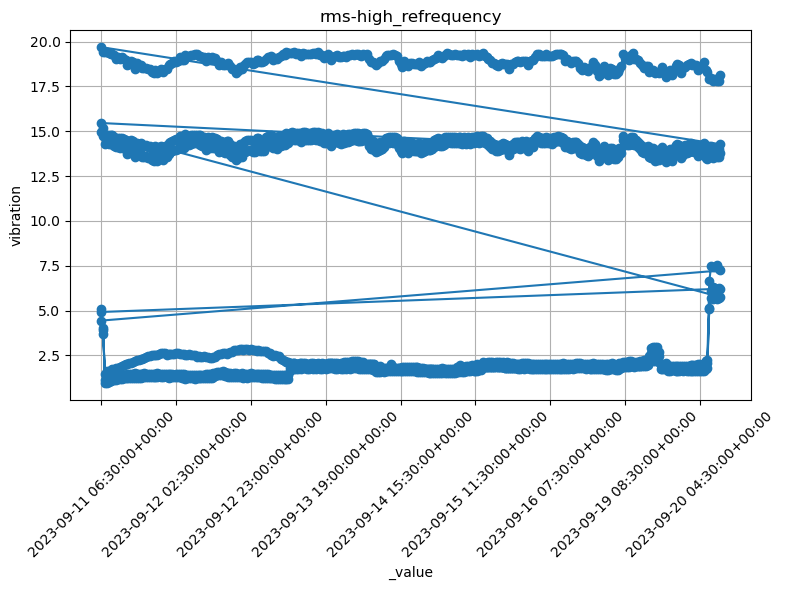

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(df_no_duplicate['_time'],
         df_no_duplicate['_value'],
         marker='o',
         linestyle='-')
plt.title('rms-high_refrequency')
plt.xlabel('_value')
plt.ylabel('vibration')

# Customize x-axis locator to show a specific number of labels (e.g., 10)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()